In [2]:
# !curl -L -o ./data/car-parts-and-car-damages.zip https://www.kaggle.com/api/v1/datasets/download/humansintheloop/car-parts-and-car-damages


# Overview
In this notebook, the `Car Damages` data from [Car Parts and Car Damages](https://www.kaggle.com/datasets/humansintheloop/car-parts-and-car-damages) dataset is explored a bit and is converted into COCO JSON, CSV and TFrecord file formats that can be used for object detection training.

Note: It appears that the `Car Parts` data is present inside the `Car damages dataset/` folder and `Car Damages` data is present inside the `Car parts dataset/` folder inside the dataset. According to the dataset description, there should be **814** images for the damages dataset.

Additionally, a bonus section is also provided using which the saved TFrecord files can be saved to Google Cloud Storage.

# Explore the file structure

Check the files available in the dataset.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./data/car-parts-and-car-damages.zip
./data/car-parts-and-car-damages/Car_damages_dataset/meta.json
./data/car-parts-and-car-damages/Car_damages_dataset/coco_damage_annotations.json
./data/car-parts-and-car-damages/Car_damages_dataset/File1/ann/Car damages 605.png.json
./data/car-parts-and-car-damages/Car_damages_dataset/File1/ann/Car damages 936.png.json
./data/car-parts-and-car-damages/Car_damages_dataset/File1/ann/Car damages 318.jpg.json
./data/car-parts-and-car-damages/Car_damages_dataset/File1/ann/Car damages 170.png.json
./data/car-parts-and-car-damages/Car_damages_dataset/File1/ann/Car damages 935.png.json
./data/car-parts-and-car-damages/Car_damages_dataset/File1/ann/Car damages 130.png.json
./data/car-parts-and-car-damages/Car_damages_dataset/File1/ann/Car damages 498.png.json
./data/car-parts-and-car-damages/Car_damages_dataset/File1/ann/Car damages 1288.png.json
./data/car-parts-and-car-damages/Car_damages_dataset/File1/ann/Car damages 192.png.json
./data/car-parts-and-car-

List the number of files in the images folder.

In [3]:
!comm -1 -2 <(ls ./data/car-parts-and-car-damages/Car_parts_dataset/File1/ann/ | sort) <(ls ./data/car-parts-and-car-damages/Car_damages_dataset/File1/ann/ | sort) | wc -l

441


In [4]:
!ls ./data/car-parts-and-car-damages/Car_parts_dataset/File1/img/ | wc -l

998


In [5]:
!ls ./data/car-parts-and-car-damages/Car_damages_dataset/File1/img/ | wc -l

814


Check random annotation file structure.

In [6]:
!cat ./data/car-parts-and-car-damages/Car_parts_dataset/File1/ann/Car\ damages\ 103.png.json

{
    "tags": [],
    "description": "",
    "objects": [
        {
            "id": 1164156066,
            "classId": 11380334,
            "description": "",
            "geometryType": "polygon",
            "labelerLogin": "GhazalehHITL",
            "createdAt": "2023-01-18T10:58:10.147Z",
            "updatedAt": "2023-01-18T10:58:10.147Z",
            "tags": [],
            "classTitle": "Back-bumper",
            "points": {
                "exterior": [
                    [
                        340.0,
                        283.0
                    ],
                    [
                        354.0,
                        287.0
                    ],
                    [
                        373.0,
                        287.0
                    ],
                    [
                        387.0,
                        284.0
                    ],
                    [
                        397.0,
                        274.0
                    ],


# Display the image with annotations

Select some random image and its corresponding annotations and display it with the label.

Size of the image: (444, 637, 3)


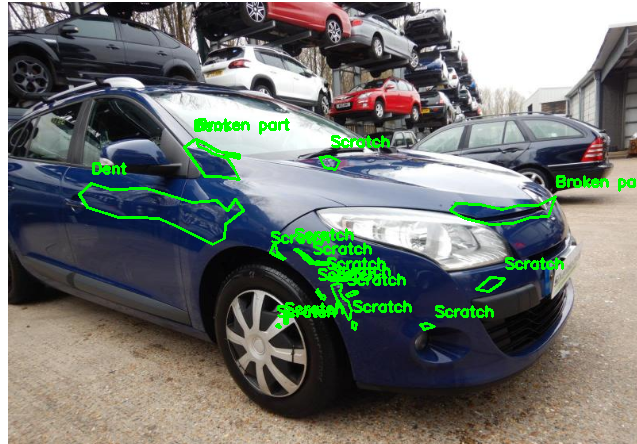

In [63]:
import os
import json
import cv2
import numpy as np
from PIL import Image

# Replace these paths with your dataset paths
data_dir = "./data/car-parts-and-car-damages/Car_damages_dataset//File1/"
image_path = os.path.join(data_dir, "img/", "Car damages 105.png")
json_path = os.path.join(data_dir, "ann/", "Car damages 105.png.json")

# Load annotations from the JSON file
with open(json_path, 'r') as f:
    annotations_data = json.load(f)

# Function to draw annotations on the image
def draw_annotations(image, annotations):
    for shape in annotations["objects"]:
        label = shape["classTitle"]
        points = shape["points"]["exterior"]
        pts = [(int(point[0]), int(point[1])) for point in points]
        pts = np.array(pts, np.int32)
        pts = pts.reshape((-1, 1, 2))

        color = (0, 255, 0)  # Green color for bounding boxes
        cv2.polylines(image, [pts], isClosed=True, color=color, thickness=2)
        cv2.putText(image, label, (pts[0][0][0], pts[0][0][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return image

# load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print ("Size of the image:",image.shape)
# display the annotations
image_with_annotations = draw_annotations(image, annotations_data)
Image.fromarray(image_with_annotations)

# Check the class distribution

Extact all the unique classes (objects) from the annotations and count instances of each of them.

In [25]:
import statistics
import matplotlib.pyplot as plt

In [26]:
datadir = "./data/car-parts-and-car-damages/"

In [27]:
carparts_dir = datadir+"/Car_parts_dataset/"
cardamages_dir = datadir+"/Car_damages_dataset/"
carparts_imgs = carparts_dir+"/File1/img/"
carparts_anns = carparts_dir+"/File1/ann/"
cardamages_imgs = cardamages_dir+"/File1/img/"
cardamages_anns = cardamages_dir+"/File1/ann/"

# Analysis of image width, height, aspect ratios and class distribution

In [28]:
# find all unique classes and their distribution
def get_class_dist_img_wh(json_dir):
    class_dist = {}
    img_heights = []
    img_widths = []
    img_aspect_ratios = []
    file_count = 0
    for filename in os.listdir(json_dir):
        if filename.endswith(".json"):
            with open(os.path.join(json_dir, filename)) as f:
                annotation_data = json.load(f)
                img_heights.append(annotation_data["size"]["height"])
                img_widths.append(annotation_data["size"]["width"])
                img_aspect_ratios.append(annotation_data["size"]["height"]/annotation_data["size"]["width"])
                for shape in annotation_data["objects"]:
                    if shape["classTitle"] in class_dist:
                        class_dist[shape["classTitle"]] += 1
                    else:
                        class_dist[shape["classTitle"]] = 1
            file_count += 1
    return file_count,class_dist,img_heights,img_widths,img_aspect_ratios

In [29]:
def plot_hist(data,title):
    plt.hist(data, bins=30, color='skyblue', edgecolor='black')
    
    # Adding labels and title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(title)
    
    # Display the plot
    plt.show()

def plot_cdf(data,title):
    # getting data of the histogram 
    count, bins_count = np.histogram(data, bins=10) 
    
    # finding the PDF of the histogram using count values 
    pdf = count / sum(count) 
    
    # using numpy np.cumsum to calculate the CDF 
    # We can also find using the PDF values by looping and adding 
    cdf = np.cumsum(pdf) 
    
    # plotting PDF and CDF 
    plt.plot(bins_count[1:], pdf, color="red", label="PDF") 
    plt.plot(bins_count[1:], cdf, label="CDF")
    plt.title(title)
    plt.legend() 
    # Display the plot
    plt.show()

In [30]:
parts_file_count,parts_class_dist,parts_img_heights,parts_img_widths,parts_img_AR = get_class_dist_img_wh(carparts_anns)
damages_file_count,damages_class_dist,damages_img_heights,damages_img_widths,damages_img_AR = get_class_dist_img_wh(cardamages_anns)

In [31]:
print ("CAR parts: Total annotation-file count:", parts_file_count)
print ("CAR parts: Distribution of the classes:", parts_class_dist)
print("CAR parts: Median height of car parts: ",statistics.median(parts_img_heights))
print("CAR parts: Median width of car parts: ",statistics.median(parts_img_widths))
print("CAR parts: Median aspect ratios of car parts: ",statistics.median(parts_img_AR))

CAR parts: Total annotation-file count: 998
CAR parts: Distribution of the classes: {'Hood': 712, 'Front-wheel': 885, 'Grille': 577, 'Headlight': 914, 'Front-bumper': 705, 'Fender': 935, 'Windshield': 632, 'Front-door': 917, 'Front-window': 951, 'Mirror': 987, 'Roof': 793, 'Back-window': 1237, 'Back-door': 721, 'Back-wheel': 865, 'Rocker-panel': 860, 'Quarter-panel': 855, 'License-plate': 370, 'Tail-light': 721, 'Back-bumper': 443, 'Trunk': 416, 'Back-windshield': 271}
CAR parts: Median height of car parts:  493.0
CAR parts: Median width of car parts:  736.5
CAR parts: Median aspect ratios of car parts:  0.7446797806510037


In [32]:
print ("CAR damages: Total annotation-file count:", damages_file_count)
print ("CAR damages: Distribution of the classes:", damages_class_dist)
print("CAR damages: Median height of car parts: ",statistics.median(damages_img_heights))
print("CAR damages: Median width of car parts: ",statistics.median(damages_img_widths))
print("CAR damages: Median aspect ratios of car parts: ",statistics.median(damages_img_AR))

CAR damages: Total annotation-file count: 814
CAR damages: Distribution of the classes: {'Dent': 1664, 'Broken part': 1500, 'Missing part': 632, 'Paint chip': 1356, 'Corrosion': 277, 'Scratch': 3242, 'Flaking': 337, 'Cracked': 76}
CAR damages: Median height of car parts:  475.0
CAR damages: Median width of car parts:  676.5
CAR damages: Median aspect ratios of car parts:  0.7478260869565218


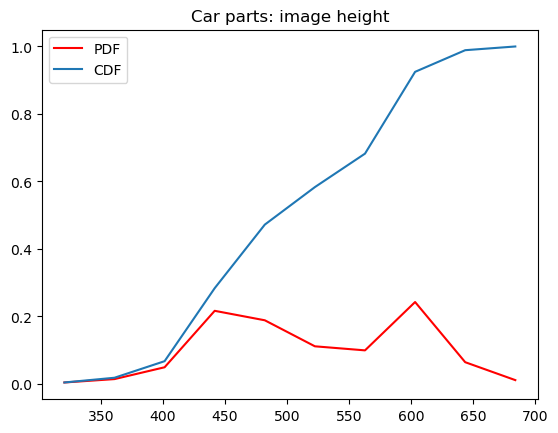

In [33]:
plot_cdf(parts_img_heights,'Car parts: image height')

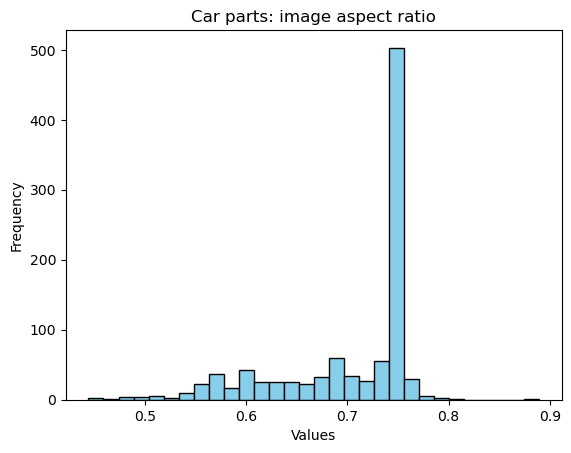

In [34]:
plot_hist(parts_img_AR,'Car parts: image aspect ratio')

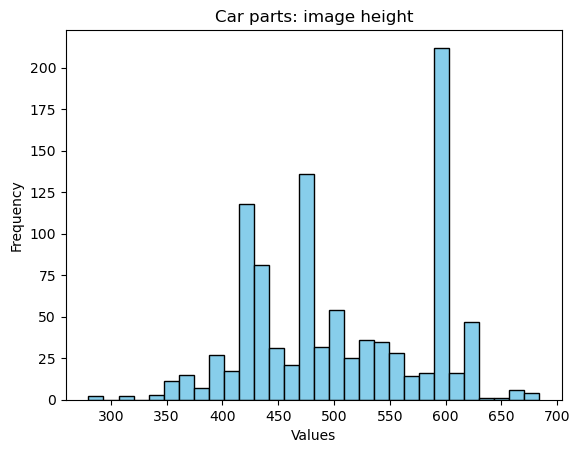

In [35]:
plot_hist(parts_img_heights,'Car parts: image height')

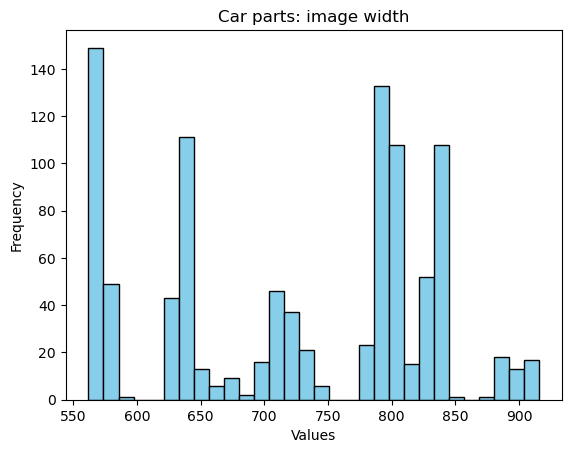

In [36]:
plot_hist(parts_img_widths,'Car parts: image width')

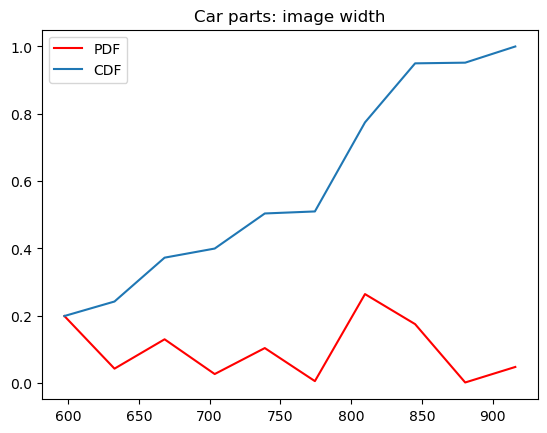

In [37]:
plot_cdf(parts_img_widths,'Car parts: image width')

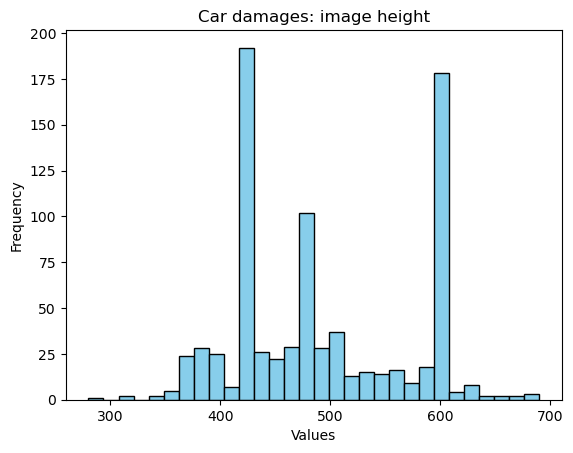

In [38]:
plot_hist(damages_img_heights,'Car damages: image height')

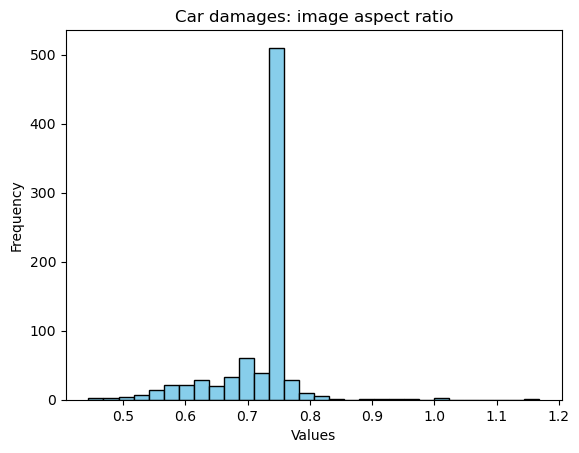

In [39]:
plot_hist(damages_img_AR,'Car damages: image aspect ratio')

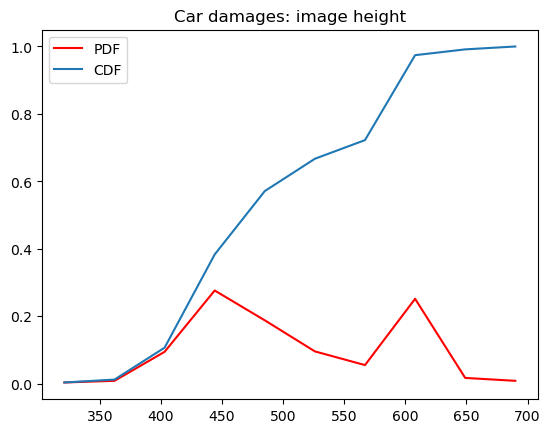

In [40]:
plot_cdf(damages_img_heights,'Car damages: image height')

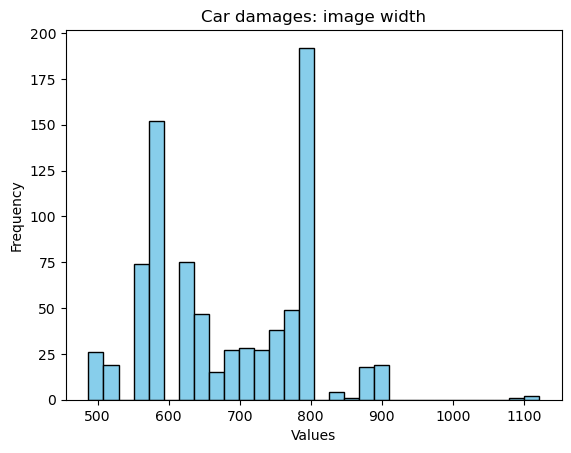

In [41]:
plot_hist(damages_img_widths,'Car damages: image width')

# Save the data to COCO JSON format

Now, lets convert the image and annotation data into COCO JSON format.

The COCO (Common Objects in Context) dataset is a widely used dataset for object detection, segmentation, and captioning tasks. The annotations in the COCO dataset are stored in JSON format. Learn more about the [COCO dataset](https://cocodataset.org/#home).

The COCO JSON format is structured and standardized to represent object annotations and metadata for each image in the dataset. Here's an overview of the key components of the COCO JSON format:

1. Image Information:
   - `id`: A unique identifier for each image.
   - `width`: Width of the image in pixels.
   - `height`: Height of the image in pixels.
   - `file_name`: The filename of the image.

2. Annotation Information:
   - `id`: A unique identifier for each annotation.
   - `image_id`: The identifier of the image to which this annotation belongs.
   - `category_id`: The identifier of the category (class) label for the annotated object.
   - `bbox`: A list of four values representing the bounding box coordinates of the object. The order is [xmin, ymin, width, height].
   - `area`: The area of the object bounding box.
   - `segmentation`: The segmentation mask of the object (used for semantic segmentation tasks).
   - `iscrowd`: A binary flag (0 or 1) indicating whether the annotated object is a single instance (0) or a group or crowd (1).
   - `attributes`: Additional attributes associated with the annotation (e.g., color, shape, etc.).

3. Category Information:
   - `id`: A unique identifier for each category (class) label.
   - `name`: The name of the category.

The JSON file may also include additional information like licenses, dataset information, and annotations for captions (in case of captioning tasks).

Here's an example of a simplified JSON representation of a COCO annotation for a single image with one annotated object:

```json
{
  "images": [
    {
      "id": 1,
      "width": 640,
      "height": 480,
      "file_name": "example.jpg"
    }
  ],
  "annotations": [
    {
      "id": 1,
      "image_id": 1,
      "category_id": 1,
      "bbox": [100, 200, 150, 100],
      "area": 15000,
      "segmentation": [100, 200, 250, 200, 250, 300, 100, 300],
      "iscrowd": 0,
      "attributes": {}
    }
  ],
  "categories": [
    {
      "id": 1,
      "name": "cat"
    }
  ]
}
```

Please note that this is a simplified example, and COCO JSON files may contain annotations for multiple images and objects, as well as additional metadata.

For this exercise, only the top 5 classes i.e., *'Scratch', 'Broken part','Dent','Paint chip','Missing part'* are used.

**Note:** The label id of the classes will be in the order of the classes specified in the below list.

In [64]:
# set the classes required
# classes = ['Scratch', 'Broken part','Dent','Paint chip','Missing part']
classes = list(damages_class_dist.keys())
classes

['Dent',
 'Broken part',
 'Missing part',
 'Paint chip',
 'Corrosion',
 'Scratch',
 'Flaking',
 'Cracked']

Iterate over the annotation files and convert the annotations to COCO JSON format.

In [65]:
# Convert annotations to COCO format

import numpy as np

# Replace these paths with your dataset paths
json_dir = os.path.join(data_dir, "ann/")
coco_path = "coco_annotations.json"

# Initialize lists to store annotations and images data
annotations_list = []
images_list = []

# Create a dictionary to map class names to class IDs
class_names = {}
for i in range(len(classes)):
    class_names[classes[i]] = i+1
print (class_names)

# Function to convert polygon annotations to COCO-style bounding boxes
def convert_polygon_to_bbox(polygon):
    x_min = min(polygon[:, 0])
    x_max = max(polygon[:, 0])
    y_min = min(polygon[:, 1])
    y_max = max(polygon[:, 1])
    return [x_min, y_min, x_max - x_min, y_max - y_min]

# Iterate through the JSON annotation files
for filename in os.listdir(json_dir):
    if filename.endswith(".json"):
        with open(os.path.join(json_dir, filename)) as f:
            annotation_data = json.load(f)
            image_filename = filename.replace(".json", "") # remove the .json to get the image file name
            image_path = os.path.join(data_dir, "img", image_filename)
            image = {
                "id": len(images_list) + 1,
                "file_name": image_filename,
                "height": annotation_data["size"]["height"],
                "width": annotation_data["size"]["width"]
            }
            images_list.append(image)

            for shape in annotation_data["objects"]:
                label = shape["classTitle"]
                # only use the classes selected
                if label in classes:
                    pass
                else:
                    continue

                class_id = class_names[label]  # Use class_ids
                bbox = convert_polygon_to_bbox(np.array(shape["points"]["exterior"]))
                annotation = {
                    "id": len(annotations_list) + 1,
                    "image_id": len(images_list),
                    "category_id": class_id,
                    "bbox": bbox,
                    "segmentation": [shape["points"]["exterior"]]
                }
                annotations_list.append(annotation)

# Create the COCO data dictionary
coco_data = {
    "annotations": annotations_list,
    "images": images_list,
    "categories": [{"id": class_id, "name": class_name} for class_name, class_id in class_names.items()]
}

{'Dent': 1, 'Broken part': 2, 'Missing part': 3, 'Paint chip': 4, 'Corrosion': 5, 'Scratch': 6, 'Flaking': 7, 'Cracked': 8}


Save the annotations to a `.json` file.

In [66]:
# Save the COCO data to a JSON file
with open(coco_path, "w") as f:
    json.dump(coco_data, f)

# Split COCO annotations to get train and validation dataset as required by MMSegment

In [67]:
import json
import random
import os
import shutil

def flatten_segmentation_mask(annotations):
    for i in range(len(annotations)):
        ann = annotations[i]
        ann["segmentation"]=[list(np.concatenate(ann["segmentation"][0]))]
    return annotations

def split_coco_annotation_and_images(coco_annotation_path, image_dir, output_dir, train_ratio=0.8, move_images=False):
    """
    Splits a COCO-style annotation file and corresponding images into train and validation datasets.

    Args:
        coco_annotation_path (str): Path to the COCO annotation JSON file.
        image_dir (str): Directory containing all the images.
        output_dir (str): Directory where train and val datasets will be saved.
        train_ratio (float): Ratio of data to use for training (default: 0.8).
        move_images (bool): If True, moves images instead of copying them.
    """
    # Load the original COCO annotations
    with open(coco_annotation_path, 'r') as f:
        coco_data = json.load(f)

    # Extract images and annotations
    images = coco_data['images']
    annotations = coco_data['annotations']

    # Shuffle images for random split
    random.shuffle(images)

    # Compute split index
    train_size = int(len(images) * train_ratio)

    # Split images into train and validation
    train_images = images[:train_size]
    val_images = images[train_size:]

    # Create image_id sets for fast lookup
    train_image_ids = {img['id'] for img in train_images}
    val_image_ids = {img['id'] for img in val_images}

    # Split annotations based on image_id
    train_annotations = flatten_segmentation_mask([ann for ann in annotations if ann['image_id'] in train_image_ids])
    val_annotations = flatten_segmentation_mask([ann for ann in annotations if ann['image_id'] in val_image_ids])

    # Create new COCO datasets for train and validation
    train_data = {
        'info': coco_data.get('info', {}),
        'licenses': coco_data.get('licenses', []),
        'categories': coco_data['categories'],
        'images': train_images,
        'annotations': train_annotations,
    }

    val_data = {
        'info': coco_data.get('info', {}),
        'licenses': coco_data.get('licenses', []),
        'categories': coco_data['categories'],
        'images': val_images,
        'annotations': val_annotations,
    }

    # Create output directories
    train_dir = os.path.join(output_dir, 'train')
    val_dir = os.path.join(output_dir, 'val')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    # Save JSON files without beautification
    train_json_path = os.path.join(train_dir, 'train.json')
    val_json_path = os.path.join(val_dir, 'val.json')
    with open(train_json_path, 'w') as f:
        json.dump(train_data, f, separators=(',', ':'))  # Compact format
    with open(val_json_path, 'w') as f:
        json.dump(val_data, f, separators=(',', ':'))  # Compact format

    # Copy/Move images to train and validation directories
    def move_or_copy(image_list, target_dir):
        for img in image_list:
            src_path = os.path.join(image_dir, img['file_name'])
            dst_path = os.path.join(target_dir, img['file_name'])
            if move_images:
                shutil.move(src_path, dst_path)  # Move images
            else:
                shutil.copy(src_path, dst_path)  # Copy images

    train_img_dir = os.path.join(train_dir, 'images')
    val_img_dir = os.path.join(val_dir, 'images')
    os.makedirs(train_img_dir, exist_ok=True)
    os.makedirs(val_img_dir, exist_ok=True)
    move_or_copy(train_images, train_img_dir)
    move_or_copy(val_images, val_img_dir)

    print(f"Train and validation datasets created:\n"
          f"  Train images: {len(train_images)}, Annotations: {len(train_annotations)}\n"
          f"  Validation images: {len(val_images)}, Annotations: {len(val_annotations)}\n"
          f"  Train JSON: {train_json_path}\n"
          f"  Val JSON: {val_json_path}")


In [68]:
split_coco_annotation_and_images(
    coco_annotation_path = carparts_dir+'/coco_parts_annotations.json',
    image_dir = carparts_dir+'/File1/img/',
    output_dir = carparts_dir,
    train_ratio=0.8, move_images=False
)

Train and validation datasets created:
  Train images: 798, Annotations: 12584
  Validation images: 200, Annotations: 3183
  Train JSON: ./data/car-parts-and-car-damages//Car_parts_dataset/train/train.json
  Val JSON: ./data/car-parts-and-car-damages//Car_parts_dataset/val/val.json


In [69]:
split_coco_annotation_and_images(
    coco_annotation_path = cardamages_dir+'/coco_damage_annotations.json',
    image_dir = cardamages_dir+'/File1/img/',
    output_dir = cardamages_dir,
    train_ratio=0.8, move_images=False
)

Train and validation datasets created:
  Train images: 651, Annotations: 7318
  Validation images: 163, Annotations: 1766
  Train JSON: ./data/car-parts-and-car-damages//Car_damages_dataset/train/train.json
  Val JSON: ./data/car-parts-and-car-damages//Car_damages_dataset/val/val.json
